# Visitors Profile Analysis

Import the libraries

In [14]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

from utils.visitors import (
    load_visitors, 
    load_visitors_answers, 
    load_visitors_questions,
    merge_answers_questions,
    preprocess_visitors,
    filter_valid_visitor_answers
)

Load all the data files related to visitors and analyse the data

In [15]:
visitors_df = load_visitors()
visitors_questions_df = load_visitors_questions()
vistors_answers_df = load_visitors_answers()
print(visitors_df.head())
print(visitors_questions_df.head())
print(vistors_answers_df.head())


                                      email gender                        id  \
0                   emilija+100_L8gA@bss.mk      F  67b70a9f2d21f543a1096602   
1   aleksandar.dimkov+mitt1_n5eA@bss.com.mk      M  67ada1ee197e604dd2722d1b   
2             daniela.p+150_YhiF@bss.com.mk      F  67b44fef197e604dd2722d3d   
3                 tanja+182_jiPa@bss.com.mk      F  67b45018197e604dd2722d3e   
4  aleksandar.dimkov+mitt10_V0iB@bss.com.mk      M  67b5f1392d21f543a10965f1   

                                                data  
0  [{ "stepId" : "5c8a78336d41a10da4f730ef", "que...  
1  [{ "stepId" : "5c8a78336d41a10da4f730ef", "que...  
2  [{ "stepId" : "5c8a78336d41a10da4f730ef", "que...  
3  [{ "stepId" : "5c8a78336d41a10da4f730ef", "que...  
4  [{ "stepId" : "5c8a78336d41a10da4f730ef", "que...  
                         id            questionTypeId  \
0  5c8a78336d41a10da4f730fe  5bf7c399b82beb7a182cc3de   
1  5c8a78336d41a10da4f73253  5bf7c399b82beb7a182cc3de   
2  5c8a78336d41a10

Check if there are any null values

In [16]:
is_visitors_null = visitors_df[visitors_df.isnull().any(axis=1)]          
print(is_visitors_null)

is_visitors_questions_null = visitors_questions_df[visitors_questions_df.isnull().any(axis=1)]          
print(is_visitors_questions_null)

is_visitors_answers_null = vistors_answers_df[vistors_answers_df.isnull().any(axis=1)]          
print(is_visitors_answers_null)

Empty DataFrame
Columns: [email, gender, id, data]
Index: []
Empty DataFrame
Columns: [id, questionTypeId, stepId, question]
Index: []
Empty DataFrame
Columns: [id, answer, questionId]
Index: []


Lets see the number of visitors, questions and answers in the source files

In [17]:
print(f"Total rows in visitors.csv: {visitors_df.shape[0]}")
print(f"Total rows in visitors_questions.csv: {visitors_questions_df.shape[0]}")
print(f"Total rows in vistors_answers.csv: {vistors_answers_df.shape[0]}")

Total rows in visitors.csv: 100
Total rows in visitors_questions.csv: 5
Total rows in vistors_answers.csv: 43


Since the total number of visitors are 100 - lets see how many males and how many females


Male Visitors (55):

Female Visitors (45):


C:\Users\ameen\AppData\Local\Temp\ipykernel_11604\647996477.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_counts, x='gender', y='count', palette='pastel')


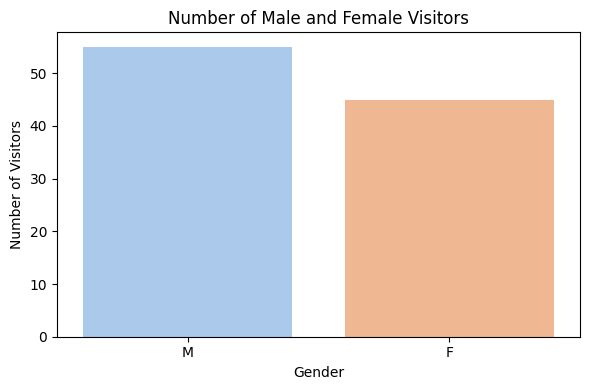

In [18]:
gender_counts = visitors_df['gender'].value_counts().rename_axis('gender').reset_index(name='count')

# Print male and female visitor info
for gender_label, icon in [('M', 'Male'), ('F', 'Female')]:
    group = visitors_df[visitors_df['gender'] == gender_label]
    print(f"\n{icon} Visitors ({len(group)}):")

plt.figure(figsize=(6, 4))
sns.barplot(data=gender_counts, x='gender', y='count', palette='pastel')
plt.title('Number of Male and Female Visitors')
plt.xlabel('Gender')
plt.ylabel('Number of Visitors')
plt.tight_layout()
plt.show()


We observe that visitors_questions file has only 5 values and the answer has 43 values - lets merge this data frames based on question id and see the mapping

In [19]:
merged_answers_questions_df = merge_answers_questions()
print(f"Total rows in merged_df: {merged_answers_questions_df.shape[0]}")
merged_answers_questions_df.head()

Total rows in merged_df: 43


,id_question,questionTypeId,stepId,id_answer,question,answer
0,5c8a78336d41a10da4f730fe,5bf7c399b82beb7a182cc3de,5c8a78336d41a10da4f730fd,5c8a78336d41a10da4f73103,Reason for Attending the Event,Personal interest
1,5c8a78336d41a10da4f730fe,5bf7c399b82beb7a182cc3de,5c8a78336d41a10da4f730fd,5c8a78336d41a10da4f73100,Reason for Attending the Event,To obtain general information
2,5c8a78336d41a10da4f730fe,5bf7c399b82beb7a182cc3de,5c8a78336d41a10da4f730fd,5c8a78336d41a10da4f730ff,Reason for Attending the Event,To source products and services
3,5c8a78336d41a10da4f730fe,5bf7c399b82beb7a182cc3de,5c8a78336d41a10da4f730fd,5c8a78336d41a10da4f73101,Reason for Attending the Event,To promote products and services
4,5c8a78336d41a10da4f730fe,5bf7c399b82beb7a182cc3de,5c8a78336d41a10da4f730fd,5c8a78336d41a10da4f73102,Reason for Attending the Event,Educational purposes


Display the number of answers present per question for the user to choose from

In [20]:
question_counts = merged_answers_questions_df["question"].value_counts().reset_index()
question_counts.columns = ["question", "num_answers"]
question_counts = question_counts.sort_values(by="num_answers", ascending=False)
print(question_counts.head())
print(f"Number of unique questions: {merged_answers_questions_df['question'].nunique()}")
print(f"Number of unique answers: {merged_answers_questions_df['answer'].nunique()}")                                 


                                            question  num_answers
0  Please indicate your company's main area of bu...           17
1  Which of the following best describes your job...           10
2   What is your company's annual purchasing budget?            7
3                     Reason for Attending the Event            5
4  What role do you play in the purchasing decisi...            4
Number of unique questions: 5
Number of unique answers: 41


Visualize the above observation

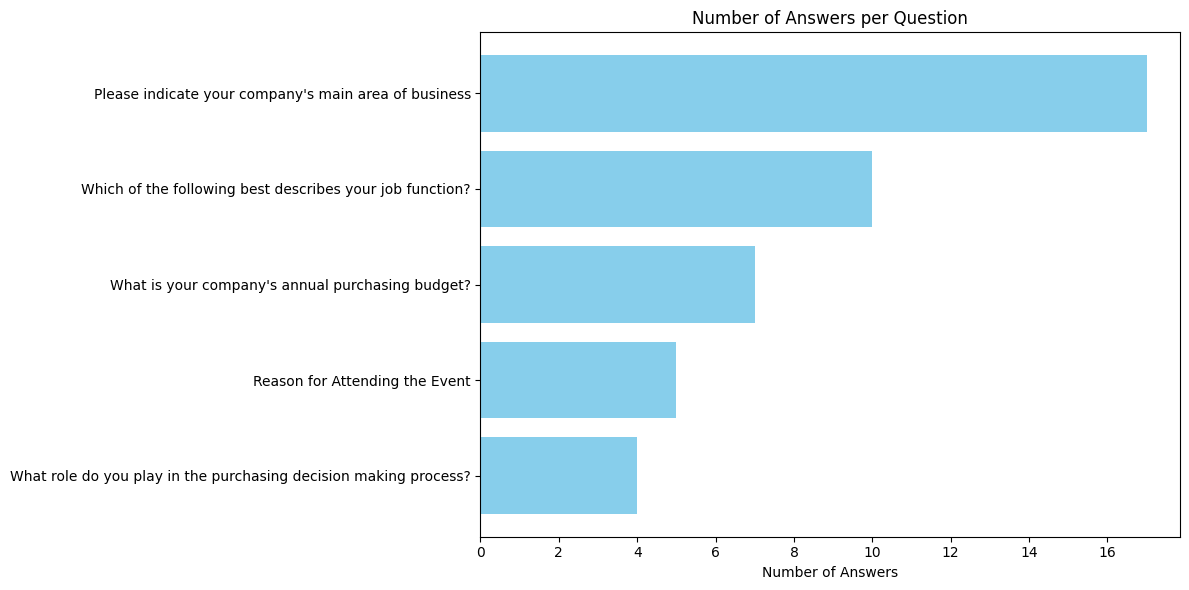


Top 3 most answered questions:
                                                question  num_answers
    Please indicate your company's main area of business           17
Which of the following best describes your job function?           10
        What is your company's annual purchasing budget?            7

Bottom 2 least answered questions:
                                                        question  num_answers
                                  Reason for Attending the Event            5
What role do you play in the purchasing decision making process?            4


In [21]:
plt.figure(figsize=(12, 6))
plt.barh(question_counts["question"], question_counts["num_answers"], color="skyblue")
plt.xlabel("Number of Answers")
plt.title("Number of Answers per Question")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# ---- Insights ----
top_questions = question_counts.head(3)
least_answered = question_counts.tail(2)

print("\nTop 3 most answered questions:")
print(top_questions.to_string(index=False))

print("\nBottom 2 least answered questions:")
print(least_answered.to_string(index=False))

Analyze the question answers from male and female

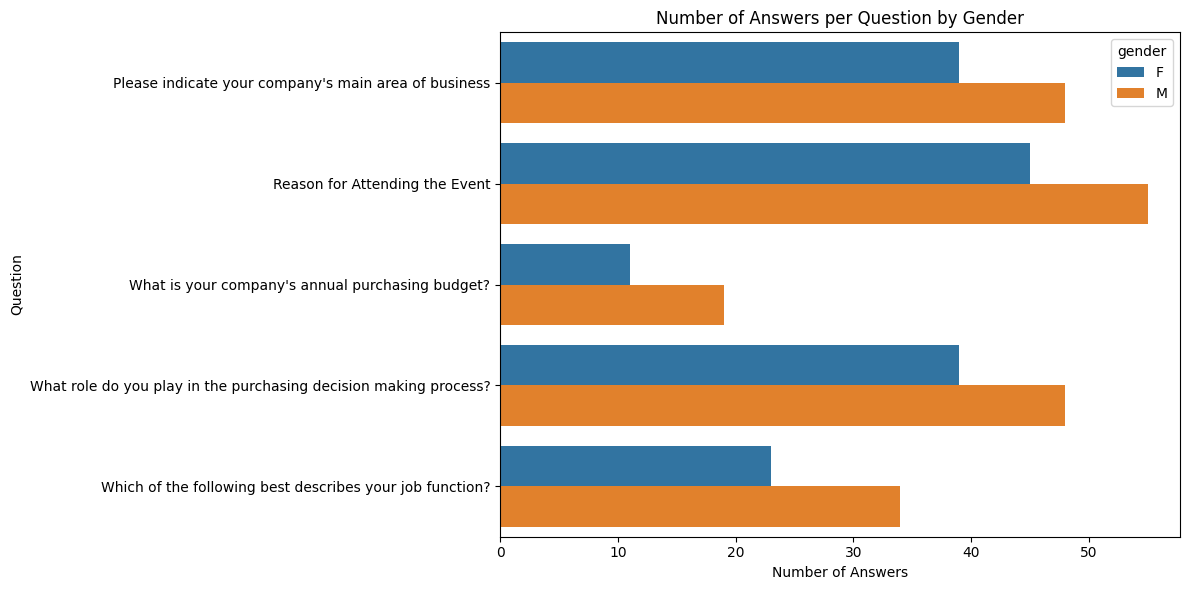

In [ ]:
visitor_expanded_answer_df = preprocess_visitors(visitors_df)
valid_visitor_answers_df = filter_valid_visitor_answers(visitor_expanded_answer_df, merged_answers_questions_df)
# Group by gender and question to get counts of answers
gender_question_counts = valid_visitor_answers_df.groupby(['gender', 'question'])['answer'].count().reset_index()
gender_question_counts.columns = ['gender', 'question', 'num_answers']

# Plot responses per question by gender
plt.figure(figsize=(12, 6))
sns.barplot(data=gender_question_counts, x='num_answers', y='question', hue='gender')
plt.title('Number of Answers per Question by Gender')
plt.xlabel('Number of Answers')
plt.ylabel('Question')
plt.tight_layout()
plt.show()